# **Data exploration and Preprocessing**

In [931]:
# import packages
import numpy as np 
import pandas as pd     
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import pickle

In [932]:
# load the dataset
df_train_set = pd.read_csv('/content/drive/MyDrive/Pump it up/train_set.csv')
df_train_labels = pd.read_csv('/content/drive/MyDrive/Pump it up/train_labels.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Pump it up/test.csv')

In [933]:
# merge the train data and labels
df_train_set.set_index('id',inplace=True) 
df_train_labels.set_index('id',inplace=True) 
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True)
df.reset_index(inplace=True)

In [934]:
# get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [935]:
# get the percentage of missing data
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
id,0.000000
status_group,0.000000
amount_tsh,0.000000
date_recorded,0.000000
funder,6.119529
gps_height,0.000000
installer,6.153199
longitude,0.000000
latitude,0.000000
wpt_name,0.000000


In [936]:
# descripbe dataset
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [937]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [938]:
# check the imbalanced target values
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [939]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [940]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [941]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [942]:
# above management and schme_management, and management_group columns have same kind of information and scheme_management
# has more null values so we we drop that column and management has more data than management_group so we keep the managemet column
df.drop(columns=[ 'scheme_management','management_group'],inplace=True )

In [943]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [944]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [945]:
# above two columns has same kind of info we drop quantity_group
df.drop(columns=[ 'quantity_group'],inplace=True )

In [946]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [947]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [948]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [949]:
df.groupby(['source_class','source_type']).count()
# to see how many sub-groups have in source_class according to source column

id  ...  waterpoint_type_group
source_class source_type                  ...                       
groundwater  borehole              11949  ...                  11949
             shallow well          16824  ...                  16824
             spring                17021  ...                  17021
surface      dam                     656  ...                    656
             rainwater harvesting   2295  ...                   2295
             river/lake            10377  ...                  10377
unknown      other                   278  ...                    278

[7 rows x 36 columns]

In [950]:
# above three columns has same kind of info we keep source column
df.drop(columns=[ 'source_class', 'source_type'],inplace=True )

In [951]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [952]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [953]:
# water quality has more unique values we keep that column
df.drop(columns=[ 'quality_group'],inplace=True )

In [954]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [955]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,payment,payment_type,water_quality,quantity,source,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,18026,19706,18012,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,19706,18444,19706,8759,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,2635,3048,2633,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,3048,2906,3048,1286,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,17697,18885,17698,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,18885,17475,18885,8619,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [956]:
# much data does not give any point so we drop it
df.drop(columns=['amount_tsh'],inplace=True )

In [957]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [958]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [959]:
# above two columns same we drop payment_type
df.drop(columns=[ 'payment_type'],inplace=True )

In [960]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [961]:
# this has only one value not going to help
df.drop(columns=['recorded_by'],inplace=True )

In [962]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [963]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [964]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [965]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  ...  waterpoint_type_group
extraction_type_class extraction_type_group         ...                       
gravity               gravity                26780  ...                  26780
handpump              afridev                 1770  ...                   1770
                      india mark ii           2400  ...                   2400
                      india mark iii            98  ...                     98
                      nira/tanira             8154  ...                   8154
                      other handpump           364  ...                    364
                      swn 80                  3670  ...                   3670
motorpump             mono                    2865  ...                   2865
                      other motorpump          122  ...                    122
other                 other                   6430  ...                   6430
rope pump             rope pump                451  ...                    451
submersible           submersible             6179  ...                   6179
wind-powered          wind-powered             117  ...                    117

[13 rows x 30 columns]

In [966]:
# above three columns has same kind of info we keep extraction_type_group
df.drop(columns=[ 'extraction_type_class', 'extraction_type'],inplace=True )

In [967]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [968]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [969]:
# above two columns has same kind of info we keep extraction_type_group
df.drop(columns=[ 'waterpoint_type_group'],inplace=True )

In [970]:
df.drop(columns=['wpt_name','scheme_name','id','region_code','date_recorded','num_private','subvillage'],inplace=True )

In [971]:
#add new column decade from construction_year
df['decade'] = df['construction_year']

In [972]:
df['decade'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: decade, dtype: int64

In [973]:
df['decade'].replace(to_replace = range(1960,1970),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = range(1970,1980),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = range(1980,1990),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = range(1990,2000),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = range(2000,2010),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = range(2010,2020),
                        value ='10s' , inplace=True)

In [974]:
df.loc[df['construction_year']!=0]['construction_year'].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

In [975]:
# replace 0 with round of mean
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [ ]:
df['installer'].value_counts().head(60)

In [977]:
# fill installer missing values with 0
df['installer'].fillna(value='0',inplace=True)

In [978]:
# same category has different names so we'll convert them
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [979]:
df['installer'].value_counts().head(20)

DWE                   17402
0                      4432
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
LGA                     408
villagers               408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [980]:
# lete create new dataframe for installer
df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

In [981]:
df['installer_cat'] = df['installer']

In [982]:
# put Others for data occurence below 400
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"


In [983]:
df['funder'].fillna(value='0',inplace=True)

In [984]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
0                         4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [985]:
# lets create new dataframe for funder
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

In [986]:
df['funder_cat'] = df['funder']

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [987]:
df.loc[df['longitude']!=0]['longitude'].describe()

count    57588.000000
mean        35.149669
std          2.607428
min         29.607122
25%         33.285100
50%         35.005943
75%         37.233712
max         40.345193
Name: longitude, dtype: float64

In [988]:
# replace with mean
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [989]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [990]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [991]:
# change null values to true
df['public_meeting'].fillna(value=True,inplace=True)
df['permit'].fillna(value=True, inplace=True)

In [992]:
# convert the target to tenary value
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [993]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [604]:
df.to_csv('/content/drive/MyDrive/Pump it up/preprocessed_data.csv', index=False)

# **Model**

In [994]:
!pip install --upgrade category_encoders

In [995]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder
from sklearn.compose import ColumnTransformer
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [1031]:
df = pd.read_csv('/content/drive/MyDrive/Pump it up/preprocessed_data.csv')

In [1033]:
# drop categorical data column
df.drop(columns=['funder','installer','construction_year'],inplace=True )

In [1034]:
df1 = df.copy()

In [1035]:
# drop columns
df1.drop(columns=['lga','ward'],inplace=True )

In [ ]:
#encode true, false with 0,1
df1['permit'] = df1['permit'].astype(bool).astype(int)
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [1038]:
# separate column as categorical and numerical
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type','decade','installer_cat','funder_cat']
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']


In [1039]:
# seperate columns to X,y 
used_cols = [c for c in df1.columns.tolist() if c not in ['status_group']]
X=df1[used_cols]
y=df1[target]

In [1041]:
# split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1042]:
# apply scaling and encoding
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

# create the pipeline
pipe = make_pipeline(preprocessor,rf)

# fit the model
pipe.fit(X_train,y_train)
# predictions
y_pred = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print(f"TRAINING accuracy: {accuracy_score(y_train, y_pred)}")
print(f"TESTING accuracy: {accuracy_score(y_test, y_pred_test)}")


TRAINING accuracy: 0.9196548821548821
TESTING accuracy: 0.7977272727272727


# **Try different type of classifiers**

In [1043]:
#LGBM
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 10, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)


pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions
y_pred = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"TRAINING accuracy: {accuracy_score(y_train, y_pred)}")
print(f"TESTING accuracy: {accuracy_score(y_test, y_pred_test)}")

TRAINING accuracy: 0.7881523569023569
TESTING accuracy: 0.7776094276094276


In [1044]:
#xgb
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# predictions
y_pred = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"TRAINING accuracy: {accuracy_score(y_train, y_pred)}")
print(f"TESTING accuracy: {accuracy_score(y_test, y_pred_test)}")

TRAINING accuracy: 0.8436237373737374
TESTING accuracy: 0.8000841750841751


In [1057]:
df_new=df1.copy()

In [1058]:
# encoding categorical columns
encoder = TargetEncoder()
for c in cat_col:
    df_new[str(c) + '_encoded'] = encoder.fit_transform(df_new[c].values, df_new['status_group'])
    df_new.drop(columns=c, inplace=True)

In [1059]:
scaler = preprocessing.RobustScaler()
def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_new[col])),columns=[col])
    return df

scaled_df = scaleColumns(df_new,[num_col])

In [1060]:
# get X,y
used_cols = [c for c in scaled_df.columns.tolist() if c not in ['status_group']]
X=scaled_df[used_cols]
y=scaled_df[target]

In [1061]:
# over sampleing
smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_sampled, y_sample = smt.fit_sample(X, y)
y_sampled = pd.Series(y_sample)

In [1062]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [1063]:
# setting classifier
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)
y_pred_test = xgb_smote.predict(X_test)

print(f"TRAINING accuracy: {accuracy_score(y_train, y_pred)}")
print(f"TESTING accuracy: {accuracy_score(y_test, y_pred_test)}")

TRAINING accuracy: 0.9702793815631418
TESTING accuracy: 0.8621616036371151


# **feauture selection**

In [ ]:
# we have seen that xgb smote classifier gives the best acuracy so far lets get the feauture importance for that

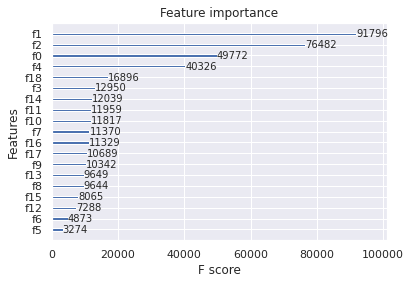

In [1074]:
plot_importance(xgb_smote)
plt.show()

In [1093]:
# we can drop two the least importance feauture
discard = ['public_meeting', 'permit']
used_cols_new = [c for c in scaled_df.columns.tolist() if c not in [target] + discard]
X_new=scaled_df[used_cols_new]
y_new=scaled_df['status_group']

In [1095]:
# over sampleing
smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_sampled_new, y_sample_new = smt.fit_sample(X_new, y_new)
y_sampled_new = pd.Series(y_sample)

In [1096]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled_new, y_sampled_new, test_size=0.2, random_state=42)

In [1097]:
# final model
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)
y_pred_test = xgb_smote.predict(X_test)

print(f"TRAINING accuracy: {accuracy_score(y_train, y_pred)}")
print(f"TESTING accuracy: {accuracy_score(y_test, y_pred_test)}")

TRAINING accuracy: 0.9687552472843285
TESTING accuracy: 0.8612833230006199


In [1131]:
with open('final_model.pkl','wb') as f:
    pickle.dump(xgb_smote,f)

# **Prediction**

In [1098]:
# do the same preprocessing method on the test set

In [1099]:
df_test = pd.read_csv('/content/drive/MyDrive/Pump it up/test.csv')

In [1100]:
df_test.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group','payment_type','extraction_type_class','extraction_type','waterpoint_type_group','wpt_name','scheme_name','id','region_code','recorded_by','amount_tsh','date_recorded','num_private','subvillage'],inplace=True )

In [1101]:
df_test['decade'] = df_test['construction_year']

In [1102]:
df_test['decade'].replace(to_replace = range(1960,1970),
                        value ='60s' , inplace=True)
df_test['decade'].replace(to_replace = range(1970,1980),
                        value ='70s' , inplace=True)
df_test['decade'].replace(to_replace = range(1980,1990),
                        value ='80s' , inplace=True)
df_test['decade'].replace(to_replace = range(1990,2000),
                        value ='90s' , inplace=True)
df_test['decade'].replace(to_replace = range(2000,2010),
                        value ='00s' , inplace=True)
df_test['decade'].replace(to_replace = range(2010,2020),
                        value ='10s' , inplace=True)

In [1103]:
df_test['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
df_test['installer'].fillna(value='0',inplace=True)

In [1104]:
# same category has different names so we'll convert them
df_test['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df_test['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df_test['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df_test['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df_test['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df_test['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df_test['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df_test['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df_test['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df_test['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df_test['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df_test['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df_test['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df_test['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df_test['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df_test['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df_test['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df_test['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df_test['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df_test['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df_test['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df_test['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df_test['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [1105]:
# lete create new dataframe for installer

df_1 = df_test.loc[df_test['installer']== 'DWE']
df_2 = df_test.loc[df_test['installer']== 'Unknown']              
df_3 = df_test.loc[df_test['installer']== 'Government'] 
df_4 = df_test.loc[df_test['installer']== 'Community'] 
df_5 = df_test.loc[df_test['installer']== 'DANIDA'] 
df_6 = df_test.loc[df_test['installer']== 'RWE'] 
df_7 = df_test.loc[df_test['installer']== 'District council'] 
df_8 = df_test.loc[df_test['installer']== 'Central government']
df_9 = df_test.loc[df_test['installer']== 'KKKT'] 
df_10 = df_test.loc[df_test['installer']== 'HESAWA'] 
df_11 = df_test.loc[df_test['installer']== 'TCRS'] 
df_12 = df_test.loc[df_test['installer']== 'world vision'] 
df_13 = df_test.loc[df_test['installer']== 'CES'] 
df_14 = df_test.loc[df_test['installer']== 'Fini Water'] 
df_15 = df_test.loc[df_test['installer']== 'RC Church'] 
df_16 = df_test.loc[df_test['installer']== 'villagers']
df_17 = df_test.loc[df_test['installer']== 'LGA']

df_test_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

In [1106]:
df_test['installer_cat'] = df_test['installer']

In [1107]:
# converting the values which has less than 400 value counts to others
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df_test.loc[~df_test["installer_cat"].isin(c_ins), "installer_cat"] = "Others"


In [1108]:
df_test['funder'].fillna(value='0',inplace=True)

In [1109]:
# lets create new dataframe for funder
df1 = df_test.loc[df_test['funder']== 'Government Of Tanzania']
df2 = df_test.loc[df_test['funder']== 'Unknown']              
df3 = df_test.loc[df_test['funder']== 'Danida'] 
df4 = df_test.loc[df_test['funder']== 'Hesawa'] 
df5 = df_test.loc[df_test['funder']== 'Rwssp'] 
df6 = df_test.loc[df_test['funder']== 'World Bank'] 
df7 = df_test.loc[df_test['funder']== 'Kkkt'] 
df8 = df_test.loc[df_test['funder']== 'World Vision']
df9 = df_test.loc[df_test['funder']== 'Unicef'] 
df10 = df_test.loc[df_test['funder']== 'Tasaf'] 
df11 = df_test.loc[df_test['funder']== 'District Council'] 
df12 = df_test.loc[df_test['funder']== 'Dhv'] 
df13 = df_test.loc[df_test['funder']== 'Private Individual'] 
df14 = df_test.loc[df_test['funder']== 'Dwsp'] 
df15 = df_test.loc[df_test['funder']== 'Norad'] 
df16 = df_test.loc[df_test['funder']== 'Germany Republi']
df17 = df_test.loc[df_test['funder']== 'Tcrs']
df18 = df_test.loc[df_test['funder']== 'Ministry Of Water']
df19 = df_test.loc[df_test['funder']== 'Water']
df20 = df_test.loc[df_test['funder']== 'Dwe']

df_test_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

In [1110]:
df_test['funder_cat'] = df_test['funder']

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df_test.loc[~df_test["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [1111]:
# replace with mean
df_test['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [1112]:
# change null values to true
df_test['public_meeting'].fillna(value=True,inplace=True)
df_test['permit'].fillna(value=True, inplace=True)

In [1113]:
df_test.to_csv('/content/drive/MyDrive/Pump it up/test_preprocessed.csv', index=False)

In [1114]:
df_test = pd.read_csv('/content/drive/MyDrive/Pump it up/test_preprocessed.csv')

In [1115]:
# drop columns which have categorical data
df_test.drop(columns=['funder','installer','construction_year'],inplace=True )

In [1116]:
df1_test = df_test.copy()

In [1117]:
df1_test.drop(columns=['lga','ward'],inplace=True )

In [1118]:
df1_test['permit'] = df1_test['permit'].astype(bool).astype(int)
df1_test['public_meeting'] = df1_test['public_meeting'].astype(bool).astype(int)

In [1119]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type','decade','installer_cat','funder_cat']
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']


In [1121]:
df5=df1_test.copy()

In [1123]:
encoder = TargetEncoder()
for c in cat_col:
    df5[str(c) + '_encoded'] = encoder.fit_transform(df5[c].values,df['status_group'][0:14850])
    df5.drop(columns=c, inplace=True)

In [1139]:
scaler = preprocessing.RobustScaler()
def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df5[col])),columns=[col])
    return df

scaled_df_test = scaleColumns(df5,[num_col])

In [1146]:
x_test=scaled_df_test[used_cols_new]

In [1134]:
#load the model
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [1142]:
output = model.predict(x_test.to_numpy())